# 1. 
Let, A and B be (n,k) and (k,m) matrices. This means that, A has n rows of k elements each and k columns of n elements each, while B has k rows of m elements each and m columns of k elements each. So, by the method of matrix multiplication, each of the k elements of each row of A (left to right direction) will be multiplied by each of the corresponding elements of each column of B (top to bottom direction), and then added taking one row of A and one column of B at a time. Therefore, there will be k x m x n multiplications and (k-1) x n x m additions altogether.

# 2.
Matrix Multiplication using a List of Lists

In [1]:
def matrixMultiplication(matrix1, matrix2):
    n = len(matrix1)
    k = len(matrix1[0])
    m = len(matrix2[0])

    result = [[0] * m for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for _ in range(k):
                result[i][j] += matrix1[i][_] * matrix2[_][j]
    return result

Matrix Multiplication using NumPy

In [2]:
import numpy as np

def matrixMultiplicationNumpy(matrix1, matrix2):
    return np.matmul(matrix1, matrix2)

Timing Comparison

In [3]:
import timeit

matrix1 = [[1999, 29999, 399, 99], [4999, 5999, 6999, 999]]
matrix2 = [[7999, 89999], [9999, 199], [11999, 12999], [99, 199]]

print("Resultant matrix using list of lists:", matrixMultiplication(matrix1, matrix2))
print("Resultant matrix using numpy:\n", matrixMultiplicationNumpy(np.array(matrix1), np.array(matrix2)))

usingNumpy_time = timeit.timeit(lambda: matrixMultiplicationNumpy(np.array(matrix1), np.array(matrix2)), number=10000)
usingList_time = timeit.timeit(lambda: matrixMultiplication(matrix1, matrix2), number=10000)

print("NumPy Time:", usingNumpy_time)
print("List of Lists Time:", usingList_time)

Resultant matrix using list of lists: [[320747404, 191084104], [184050904, 542277604]]
Resultant matrix using numpy:
 [[320747404 191084104]
 [184050904 542277604]]
NumPy Time: 0.044398700003512204
List of Lists Time: 0.04493779999029357


It is observed that, the time required to perform the matrix multiplication using Numpy is faster than using list of lists. It is because Numpy uses parallel computations for matrix multiplication using vectorization concept. However, there may be exceptions in the time required, where the size and elements of the matrices to be multiplied are small.

# 3. 
If finding the highest element requires one pass and finding the second highest element requires two passes, then finding the median will require approximately n/2 passes, where n is the length of the array. This is because we need to find the middle element, and on average, it would take ceiling(n/2) passes if the array has odd number of elements and (n/2 + 1) passes if the array has even number of elements, to reach the middle element. Therefore, the time complexity of finding the median using this method would be O($n^2$/2) or simply O($n^2$).
<br>
A better method can be to sort the elements of the array first and then find the middle element, as we will do analytically on pen and paper. The time complexity in this case would be O($nlogn$).

In [4]:
def medianUsingMultiplePasses(arr):
    n = len(arr) 
    if n%2 == 0:
        for i in range((n//2) + 1):
            maxIndex = i
            for j in range(i+1, n):
                if arr[j] > arr[maxIndex]:    
                    maxIndex = j
            arr[i], arr[maxIndex] = arr[maxIndex], arr[i]
        return (arr[n // 2] + arr[n // 2 - 1]) / 2
    
    for i in range((n + 1) // 2):
        maxIndex = i
        for j in range(i + 1, n):
            if arr[j] > arr[maxIndex]:
                maxIndex = j
        arr[i], arr[maxIndex] = arr[maxIndex], arr[i]

    return arr[(n - 1) // 2]    

In [5]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr

    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

my_arr = [3, 6, 8, 10, 5, 1, 2, 1]
sorted_list = quicksort(my_arr)
print("Original List:", my_arr)
print("Sorted List:", sorted_list)

Original List: [3, 6, 8, 10, 5, 1, 2, 1]
Sorted List: [1, 1, 2, 3, 5, 6, 8, 10]


In [6]:
def medianBySorting(arr):
    sortedArr = quicksort(arr)
    if len(arr)%2 == 0:
        median = float((sortedArr[len(sortedArr) // 2] + sortedArr[(len(sortedArr) // 2) - 1])/2)
    else:
        median = sortedArr[len(sortedArr) // 2]
    return median

# Method 1: Multiple passes
medianByMultiplePasses = medianUsingMultiplePasses(my_arr)
print(f"Median (Multiple Pass): {medianByMultiplePasses}")

# Method 2: 
print(f"Median (Sorting): {medianBySorting(my_arr)}")

# numpy.median
medianNumpy = np.median(my_arr)
print("Median (numpy.median):", medianNumpy)

Median (Multiple Pass): 4.0
Median (Sorting): 4.0
Median (numpy.median): 4.0


# 4.
Gradient of the given function with respect to x is $2xy + y^3 \cos(x)$.
<br>
Gradient of the given function with respect to y is $x^2 + 3y^2 \sin(x)$.

In [7]:
# Testing and checking the gradient for some random values of x and y
xVal = 2.0
yVal = 3.0
gradientAtxVal = 2*xVal*yVal + (yVal**3)*np.cos(xVal)
gradientAtyVal = xVal**2 + 3*(yVal**2)*np.sin(xVal)

print("Gradient with respect to x:", gradientAtxVal)
print("Gradient with respect to y:", gradientAtyVal)

Gradient with respect to x: 0.7640354132271554
Gradient with respect to y: 28.551030524293406


In [8]:
pip install jax jaxlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


# 5.

In [11]:
import jax
import jax.numpy as jnp

def my_function(x, y):
    return (x**2) * y + (y**3) * jnp.sin(x)

# finding gradient
grad_fn = jax.grad(my_function, argnums=(0, 1))

gradient_x, gradient_y = grad_fn(xVal, yVal)

print("Gradient with respect to x:", gradient_x)
print("Gradient with respect to y:", gradient_y)

Gradient with respect to x: 0.7640352
Gradient with respect to y: 28.55103


# 6.

In [12]:
import sympy as sp
x, y = sp.symbols('x y')
f = (x**2)*y + (y**3)*sp.sin(x)

In [13]:
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
print(df_dx)
print(df_dy)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


In [15]:
print("Gradient with respect to x:", df_dx.subs({x: xVal, y: yVal}))
print("Gradient with respect to y:", df_dy.subs({x: xVal, y: yVal}))

Gradient with respect to x: 0.764035413227155
Gradient with respect to y: 28.5510305242934


# 7.

In [16]:
student_records = {
    1: {2022: {
        1: {'Branch 1': {
            1: {'Roll number': 1,
                'Name': 'N',
                'Marks': {
                    1: {'Maths': 100,
                        'English': 70
                        ## marks of other subjects
                        }
                }}
        }},
        2: {'Branch 2': {}}
    }
    },
    2: {2023: {
        1: {'Branch 1': {}},
        2: {'Branch 2': {}}
    }
    },
    3: {2024: {
        1: {'Branch 1': {}},
        2: {'Branch 2': {}}
    }
    },
    4: {2025: {
        1: {'Branch 1': {}},
        2: {'Branch 2': {}}
    }
    }
}

# 8.

In [17]:
class Marks:
    def __init__(self, maths, english):
        self.maths = maths
        self.english = english

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

def print_structure(database):
    for year in database:
        print(f"\n{year.year}")
        for branch in year.branches:
            print(f"  {branch.name}")
            for student in branch.students:
                print(f"    Roll Number: {student.roll_number}, Name: {student.name}, Marks: \n        Maths={student.marks.maths}, English={student.marks.english}")

marks1 = Marks(100, 70)
marks2 = Marks(90, 80)
marks3 = Marks(95, 75)
marks4 = Marks(85, 85)
student1 = Student(1, 'N', marks1)
student2 = Student(2, 'O', marks2)
student3 = Student(3, 'P', marks3)
student4 = Student(4, 'Q', marks4)
branch1 = Branch('Branch 1', [student1, student2])
branch2 = Branch('Branch 2', [student3, student4])

year2022 = Year(2022, [branch1, branch2])
year2023 = Year(2023, [Branch('Branch 1', []), Branch('Branch 2', [])]) ### Branches for this year is created within this year class only, can also be created separately as done for the year2022
year2024 = Year(2024, [Branch('Branch 1', []), Branch('Branch 2', [])]) ### Branches for this year is created within this year class only, can also be created separately as done for the year2022
year2025 = Year(2025, [Branch('Branch 1', []), Branch('Branch 2', [])]) ### Branches for this year is created within this year class only, can also be created separately as done for the year2022

full_database = [year2022, year2023, year2024, year2025]

print_structure(full_database)


2022
  Branch 1
    Roll Number: 1, Name: N, Marks: 
        Maths=100, English=70
    Roll Number: 2, Name: O, Marks: 
        Maths=90, English=80
  Branch 2
    Roll Number: 3, Name: P, Marks: 
        Maths=95, English=75
    Roll Number: 4, Name: Q, Marks: 
        Maths=85, English=85

2023
  Branch 1
  Branch 2

2024
  Branch 1
  Branch 2

2025
  Branch 1
  Branch 2


# 9.

In [18]:
import matplotlib.pyplot as plt

x_values = np.arange(0.5, 100.0, 0.5)

### 1.

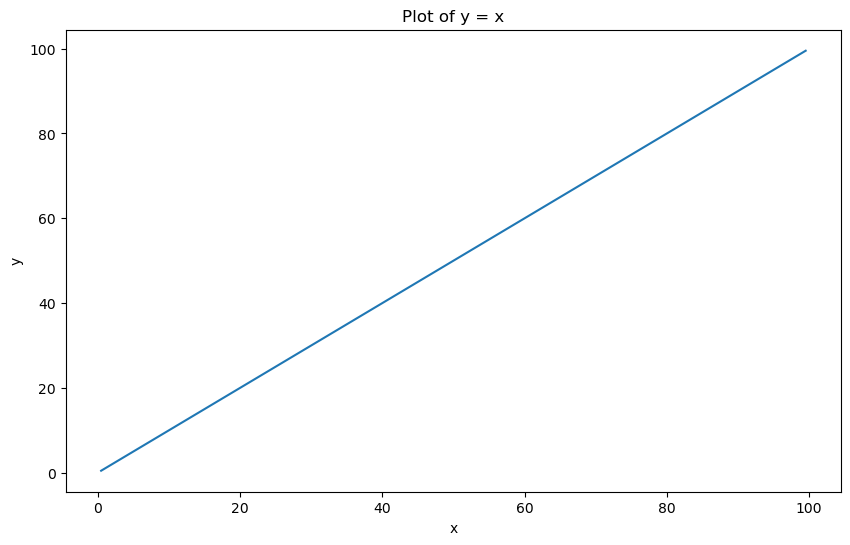

In [19]:
y1_values = x_values

plt.figure(figsize=(10, 6))
plt.plot(x_values, y1_values, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.show()

### 2.

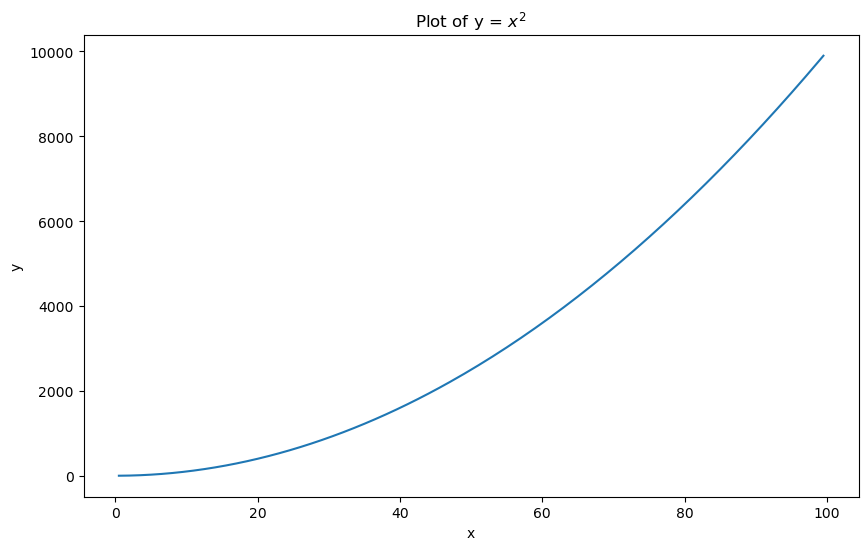

In [20]:
y2_values = x_values**2

plt.figure(figsize=(10, 6))
plt.plot(x_values, y2_values, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = $x^2$')
plt.show()

### 3.

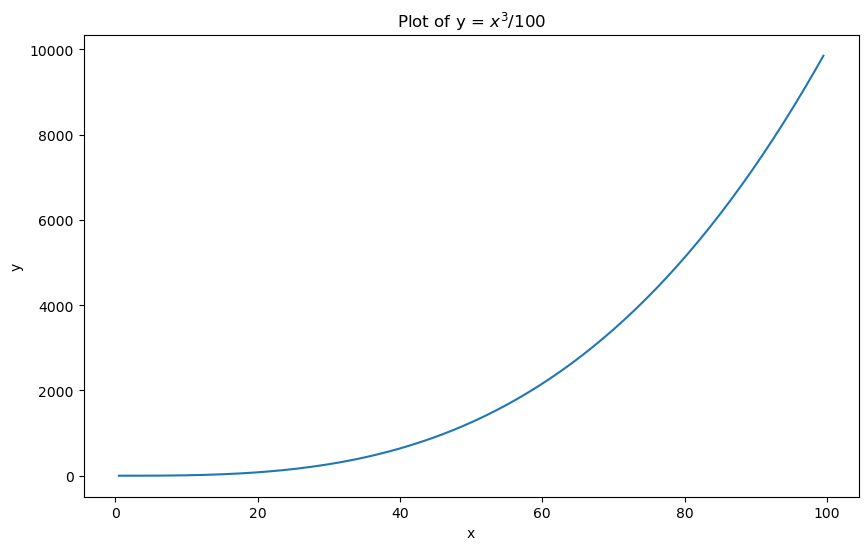

In [21]:
y3_values = (x_values**3) / 100

plt.figure(figsize=(10, 6))
plt.plot(x_values, y3_values, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = $x^3/100$')
plt.show()

### 4.

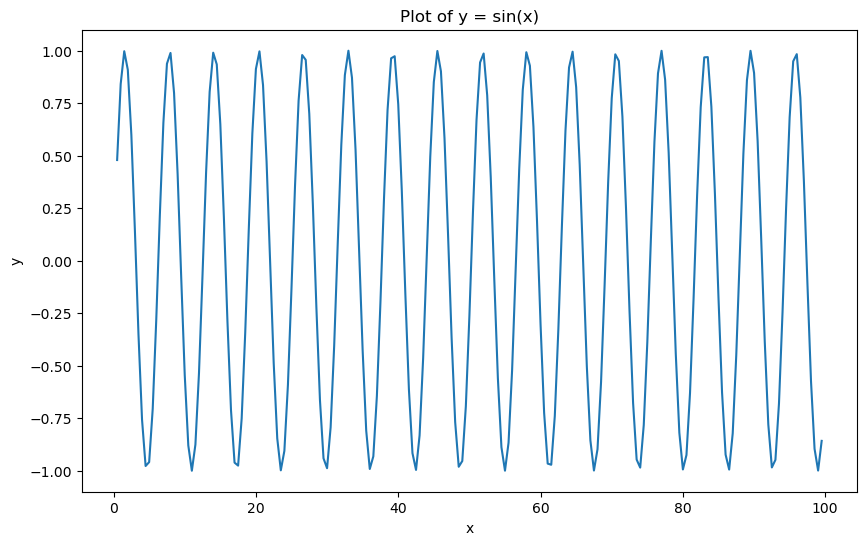

In [22]:
y4_values = np.sin(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y4_values, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.show()

### 5.

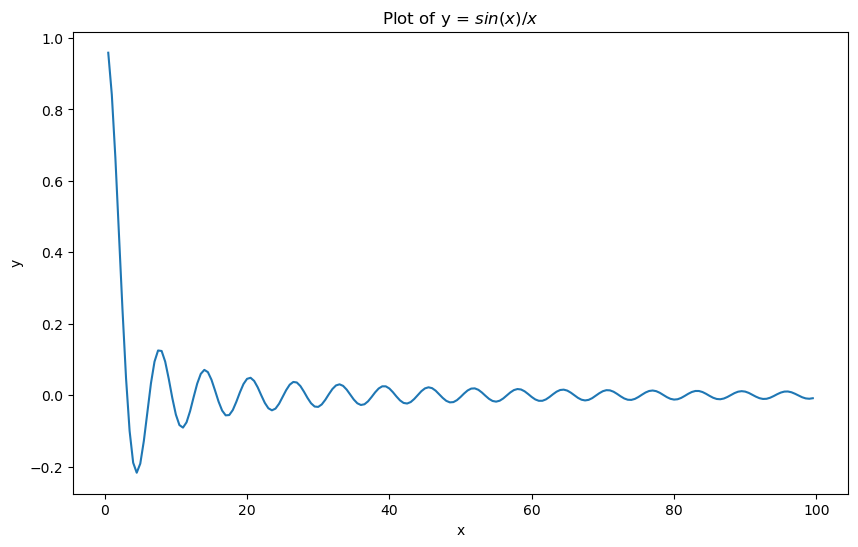

In [23]:
y5_values = np.sin(x_values)/x_values

plt.figure(figsize=(10, 6))
plt.plot(x_values, y5_values, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = $sin(x)/x$')
plt.show()

### 6.

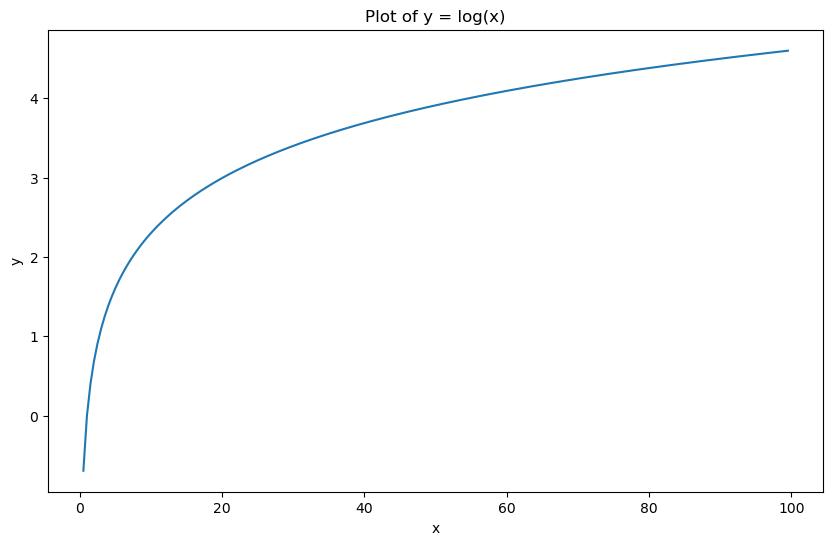

In [24]:
y6_values = np.log(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y6_values, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')
plt.show()

### 7.

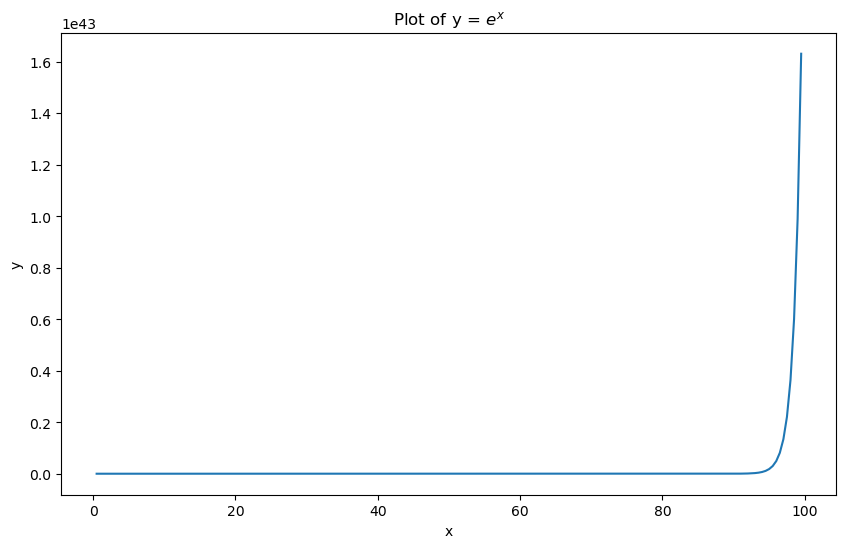

In [25]:
y7_values = np.exp(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y7_values, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = $e^x$')
plt.show()

# 10.
Generating a matrix of size 20x5 containing random numbers drawn uniformly from the range of 1 to 2.

In [26]:
# np.random.seed(42) ##for reproducibility
matrix_random_num = np.random.uniform(1, 2, size=(20, 5))
print(matrix_random_num)

[[1.44984393 1.47271049 1.97974596 1.281891   1.93956139]
 [1.44597115 1.46400389 1.98916846 1.22441173 1.88053191]
 [1.96613922 1.99786523 1.00804909 1.62701476 1.90959824]
 [1.71199091 1.04987026 1.23287011 1.46278555 1.65770511]
 [1.06562211 1.85621012 1.11602203 1.43565573 1.77147388]
 [1.46582031 1.59252589 1.03321591 1.16112706 1.83767431]
 [1.19226349 1.47773226 1.53407332 1.02319441 1.41596866]
 [1.09604735 1.11806913 1.61009339 1.70871118 1.06711066]
 [1.43109929 1.07489472 1.88908848 1.39064584 1.06121265]
 [1.46428678 1.68665061 1.08037655 1.71884899 1.27935614]
 [1.75630723 1.31950376 1.57199234 1.57275596 1.69236539]
 [1.50261328 1.75063364 1.85630877 1.82071476 1.52095949]
 [1.45030387 1.50533967 1.21009939 1.51562883 1.37990176]
 [1.2503275  1.62345799 1.25684468 1.8949213  1.42592007]
 [1.53749784 1.11223604 1.58036542 1.80870249 1.98751297]
 [1.15497872 1.79197887 1.61324487 1.16517215 1.28915314]
 [1.154659   1.98231635 1.13984249 1.02825656 1.81379209]
 [1.16489929 1

In [27]:
import pandas as pd

df = pd.DataFrame(matrix_random_num, columns=['a', 'b', 'c', 'd', 'e'])

# Highest standard deviation
column_with_highest_std = df.std().idxmax()

# Lowest mean
row_with_lowest_mean = df.mean(axis=1).idxmin()

print("DataFrame:")
print(df)
print("\nColumn with the highest standard deviation:", column_with_highest_std)
print("Row with the lowest mean:", row_with_lowest_mean)

DataFrame:
           a         b         c         d         e
0   1.449844  1.472710  1.979746  1.281891  1.939561
1   1.445971  1.464004  1.989168  1.224412  1.880532
2   1.966139  1.997865  1.008049  1.627015  1.909598
3   1.711991  1.049870  1.232870  1.462786  1.657705
4   1.065622  1.856210  1.116022  1.435656  1.771474
5   1.465820  1.592526  1.033216  1.161127  1.837674
6   1.192263  1.477732  1.534073  1.023194  1.415969
7   1.096047  1.118069  1.610093  1.708711  1.067111
8   1.431099  1.074895  1.889088  1.390646  1.061213
9   1.464287  1.686651  1.080377  1.718849  1.279356
10  1.756307  1.319504  1.571992  1.572756  1.692365
11  1.502613  1.750634  1.856309  1.820715  1.520959
12  1.450304  1.505340  1.210099  1.515629  1.379902
13  1.250327  1.623458  1.256845  1.894921  1.425920
14  1.537498  1.112236  1.580365  1.808702  1.987513
15  1.154979  1.791979  1.613245  1.165172  1.289153
16  1.154659  1.982316  1.139842  1.028257  1.813792
17  1.164899  1.020148  1.368060  1

# 11.

In [28]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

print("Updated DataFrame:")
print(df)

Updated DataFrame:
           a         b         c         d         e         f    g
0   1.449844  1.472710  1.979746  1.281891  1.939561  8.123753  GT8
1   1.445971  1.464004  1.989168  1.224412  1.880532  8.004087  GT8
2   1.966139  1.997865  1.008049  1.627015  1.909598  8.508667  GT8
3   1.711991  1.049870  1.232870  1.462786  1.657705  7.115222  LT8
4   1.065622  1.856210  1.116022  1.435656  1.771474  7.244984  LT8
5   1.465820  1.592526  1.033216  1.161127  1.837674  7.090363  LT8
6   1.192263  1.477732  1.534073  1.023194  1.415969  6.643232  LT8
7   1.096047  1.118069  1.610093  1.708711  1.067111  6.600032  LT8
8   1.431099  1.074895  1.889088  1.390646  1.061213  6.846941  LT8
9   1.464287  1.686651  1.080377  1.718849  1.279356  7.229519  LT8
10  1.756307  1.319504  1.571992  1.572756  1.692365  7.912925  LT8
11  1.502613  1.750634  1.856309  1.820715  1.520959  8.451230  GT8
12  1.450304  1.505340  1.210099  1.515629  1.379902  7.061274  LT8
13  1.250327  1.623458  1.256

In [29]:
# Number of rows in the dataframe where the value in the column “g” is “LT8”
rows_with_LT8 = df[df['g'] == 'LT8'].shape[0]

# Standard deviation of the column "f" for rows where the value in the column "g" is "LT8
std_dev_LT8 = df[df['g'] == 'LT8']['f'].std()

# Standard deviation of the column "f" for rows where the value in the column "g" is "GT8"
std_dev_GT8 = df[df['g'] == 'GT8']['f'].std()

print("Number of rows where the value in the column 'g' is 'LT8':", rows_with_LT8)
print("Standard deviation of column 'f' for rows where 'g' is 'LT8':", std_dev_LT8)
print("Standard deviation of column 'f' for rows where 'g' is 'GT8':", std_dev_GT8)

Number of rows where the value in the column 'g' is 'LT8': 15
Standard deviation of column 'f' for rows where 'g' is 'LT8': 0.4174218669562885
Standard deviation of column 'f' for rows where 'g' is 'GT8': 0.23987081721393197


# 12.

Broadcasting is a feature/system in Numpy that allows the application of binary operations on arrays of different shapes and sizes, without the need for explicitly creating copies or reshaping the arrays. It implicitly expands smaller arrays to match the shape of larger arrays, enabling element-wise operations even when the shapes are not the same. When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when
1. They are equal, or
2. One of them is 1.
Below is a simple example to illustrate broadcasting:

In [30]:
import numpy as np

# A 2x3 array
arr_a = np.array([[1, 2, 3],
                  [4, 5, 6]])

# A 1x3 array
arr_b = np.array([10, 20, 30])

# Broadcasting in multiplying the two arrays:
result = arr_a * arr_b

# Print the original arrays and the result
print("Array A:")
print(arr_a)
print("\nArray B:")
print(arr_b)
print("\nResult after Broadcasting:")
print(result)

Array A:
[[1 2 3]
 [4 5 6]]

Array B:
[10 20 30]

Result after Broadcasting:
[[ 10  40  90]
 [ 40 100 180]]


# 13.

In [31]:
import numpy as np

def ArgMin(arr):
    minIndex = 0
    
    for i in range(1, len(arr)):
        if arr[i] < arr[minIndex]:
            minIndex = i
    
    return minIndex

arr_test = np.array([5, 2, 8, 1, 0, 3])
result = ArgMin(arr_test)
result_np = np.argmin(arr_test) # Verifying the result using np.argmin

print("Custom argmin:", result)
print("np.argmin result:", result_np)
assert result == result_np, "Results do not match!" # Verifying if the results match

Custom argmin: 4
np.argmin result: 4


#### Thanks!